In [2]:
import tensorflow as tf
keras = tf.keras
from keras import Sequential, Input
from keras.layers import Conv2D, Dense, AveragePooling2D, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from keras.utils import plot_model
import os

2023-08-26 22:39:42.444039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 22:39:44.025835: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
cats = []
dogs = []
for fname in os.listdir('./catsdogs/train/cats'):
    img = load_img(f'./catsdogs/train/cats/{fname}')
    cats.append(img_to_array(img))
for fname in os.listdir('./catsdogs/validation/dogs'):
    img = load_img(f'./catsdogs/validation/dogs/{fname}')
    dogs.append(img_to_array(img))

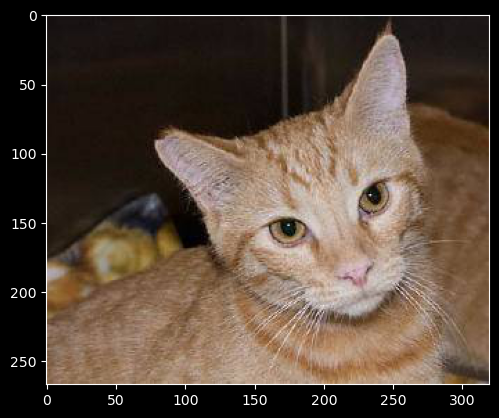

In [8]:
plt.imshow(plt.imread('catsdogs/train/cats/cat.14.jpg'))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = './catsdogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 1598 images belonging to 2 classes.


In [7]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 598 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(28, 28),  
    batch_size=20,
    class_mode='categorical',
)

Found 804 images belonging to 2 classes.


In [9]:
lenet_model = Sequential([
    Input(shape=(28, 28, 3)),
    Conv2D(6, (5, 5), padding="same", activation="tanh"),
    AveragePooling2D(strides=2),
    Conv2D(16, (5, 5), padding="valid", activation="tanh"),
    AveragePooling2D(strides=2),
    Flatten(),
    Dense(120, activation="sigmoid"),
    Dense(84, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="LeNet")
lenet_model.summary()

2023-08-26 19:44:35.788606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.085420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.085511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.090243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.090347: I tensorflow/compile

Model: "LeNET"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               48120 

r/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.393787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.393984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-26 19:44:36.394000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1726] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2023-08-26 19:44:36.394068: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to r

In [10]:
lenet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [11]:
lenet_hist = lenet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20


2023-08-26 19:44:38.849894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-26 19:44:39.511152: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 19:44:39.878654: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe98402d120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-26 19:44:39.878765: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-08-26 19:44:39.928497: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-26 19:44:40.443500: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-26 19:44:40.564262: I ./tensorflow/compiler/jit/device_

80/80 [==============================] - 30s 322ms/step - loss: 0.6977 - acc: 0.5025 - val_loss: 0.6968 - val_acc: 0.5000
Epoch 2/20
80/80 [==============================] - 24s 295ms/step - loss: 0.6920 - acc: 0.5131 - val_loss: 0.6866 - val_acc: 0.5602
Epoch 3/20
80/80 [==============================] - 24s 301ms/step - loss: 0.6807 - acc: 0.5751 - val_loss: 0.7018 - val_acc: 0.5385
Epoch 4/20
80/80 [==============================] - 23s 284ms/step - loss: 0.6790 - acc: 0.5695 - val_loss: 0.6797 - val_acc: 0.5803
Epoch 5/20
80/80 [==============================] - 24s 300ms/step - loss: 0.6625 - acc: 0.5907 - val_loss: 0.6597 - val_acc: 0.5987
Epoch 6/20
80/80 [==============================] - 23s 293ms/step - loss: 0.6485 - acc: 0.6158 - val_loss: 0.6586 - val_acc: 0.5886
Epoch 7/20
80/80 [==============================] - 23s 284ms/step - loss: 0.6417 - acc: 0.6264 - val_loss: 0.6661 - val_acc: 0.5886
Epoch 8/20
80/80 [==============================] - 23s 286ms/step - loss: 0.636

In [13]:
lenet_model.evaluate(test_generator, batch_size=32)

41/41 [==============================] - 9s 223ms/step - loss: 0.6705 - acc: 0.6405


[0.6704928874969482, 0.6405472755432129]

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 1598 images belonging to 2 classes.


In [21]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 598 images belonging to 2 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
    test_dir,  
    target_size=(227, 227),  
    batch_size=20,
    class_mode='categorical',
)

Found 804 images belonging to 2 classes.


In [28]:
alexnet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=(4, 4), padding="valid", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(256, (5, 5), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(384, (3, 3), padding="same", activation="tanh"),
    Conv2D(256, (3, 3), padding="same", activation="tanh"),
    MaxPooling2D(pool_size=(3, 3), strides=2),
    Flatten(),
    Dense(4096, activation="sigmoid"),
    Dense(4096, activation="sigmoid"),
    Dense(2, activation="sigmoid"),
], name="AlexNet")
alexnet_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 384)       1327

In [29]:
alexnet_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['acc'])

In [30]:
alexnet_hist = alexnet_model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
80/80 [==============================] - 31s 326ms/step - loss: 1.0639 - acc: 0.4875 - val_loss: 0.7496 - val_acc: 0.5000
Epoch 2/20
80/80 [==============================] - 25s 311ms/step - loss: 0.7160 - acc: 0.4737 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 3/20
80/80 [==============================] - 25s 318ms/step - loss: 0.7222 - acc: 0.4712 - val_loss: 0.7002 - val_acc: 0.5000
Epoch 4/20
80/80 [==============================] - 27s 335ms/step - loss: 0.7435 - acc: 0.4987 - val_loss: 0.7228 - val_acc: 0.5000
Epoch 5/20
80/80 [==============================] - 25s 313ms/step - loss: 0.7063 - acc: 0.5038 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 6/20
80/80 [==============================] - 25s 318ms/step - loss: 0.7202 - acc: 0.4962 - val_loss: 0.7446 - val_acc: 0.5000
Epoch 7/20
80/80 [==============================] - 26s 321ms/step - loss: 0.7086 - acc: 0.5050 - val_loss: 0.7037 - val_acc: 0.5000
Epoch 8/20
80/80 [==============================] - 26s 322ms/step - 

In [31]:
alexnet_model.evaluate(test_generator)

41/41 [==============================] - 10s 237ms/step - loss: 0.7114 - acc: 0.5000


[0.7114084959030151, 0.5]